### Extract routes from ASKCOS (web) downloaded json files

In [1]:
import json
import re
import os

1. **Route Generation**  
   - Go to the ASKCOS website.  
   - Run the *Route Generation* job.

2. **Clustering**  
   - Once route generation completes, start the clustering step.  
   - **Do not** click **View clusters** at this stage.

3. **Download Results**  
   - Click **Download Results → All trees**.  
   - Save the archive.

4. **Relocate Output**  
   - Extract/move the downloaded file into your pre‑generated input directory.  
   - Rename it using the specified job ID so the pipeline can find it.

In [2]:
mol_id = 202

In [ ]:
input_file = f'./data/askcos_data/mol_{mol_id}/treeResults.json'

with open(input_file, 'r') as file:
    routes = json.load(file)


In [ ]:
from cgr_clustering.askcos_converter import extract_clusters

clusters = extract_clusters(routes)

0 -1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 0
16 1
17 7
18 7
19 7
20 7
21 7
22 7
23 2
24 7
25 5
26 7
27 1
28 1
29 1
30 3
31 4
32 1
33 1
34 1
35 1
36 1
37 6
38 9
39 8
40 1
41 1
42 6
43 6
44 6
45 6
46 6
47 6
48 6
49 6
50 6
51 13
52 13
53 13
54 13
55 13
56 13
57 10
58 13
59 11
60 13
61 13
62 13
63 13
64 13
65 13
66 13
67 10
68 13
69 11
70 13
71 13
72 13
73 13
74 13
75 13
76 13
77 10
78 13
79 11
80 13
81 13
82 13
83 13
84 13
85 13
86 13
87 10
88 13
89 11
90 13
91 13
92 13
93 13
94 13
95 13
96 13
97 10
98 13
99 11
100 13
101 13
102 13
103 13
104 13
105 13
106 13
107 10
108 13
109 11
110 13
111 13
112 13
113 13
114 13
115 13
116 13
117 10
118 13
119 11
120 13
121 13
122 13
123 13
124 13
125 13
126 13
127 10
128 13
129 11
130 13
131 13
132 13
133 13
134 13
135 13
136 13
137 10
138 13
139 11
140 13
141 21
142 21
143 21
144 21
145 21
146 21
147 16
148 21
149 21
150 21
151 21
152 21
153 21
154 21
155 21
156 21
157 15
158 21
159 21
160 21
161 21
162 21
163 21
164 21
165 2

### Distribution of LSTM-based clusters

In [ ]:
group_sizes = [len(routes_set) for routes_set in clusters.values()]
print(group_sizes)

[1, 1, 25, 1, 1, 1, 1, 10, 8, 1, 1, 9, 9, 1, 72, 1, 1, 1, 1, 1, 1, 1, 50, 1]


24


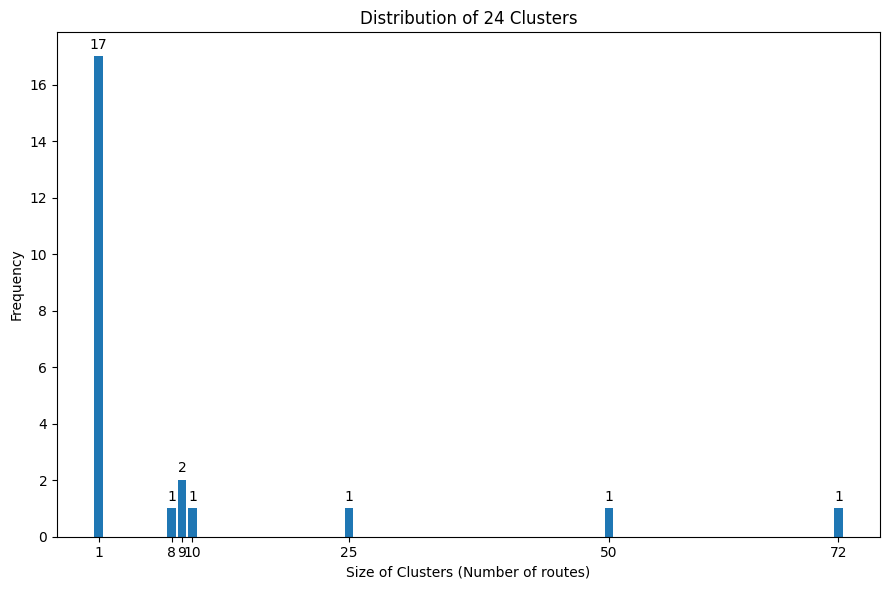

In [8]:
from cgr_clustering.visualization import plot_distribution

print(len(group_sizes))

# plot_distribution(group_sizes, clusters)
plot_distribution(group_sizes, clusters, method='LSTM')

### Extract RouteCGR and SB-CGR

In [9]:
from cgr_clustering.askcos_converter import extract_pathway
from cgr_clustering.cgr import process_single_route, compose_all_sb_cgrs, route_smi_2_cgr
from tqdm import tqdm

In [ ]:
def process_all_routes(routes):
    route_cgrs_dict = {}
    for i, route in tqdm(enumerate(routes)):
        nodes = route['nodes']
        pathway = extract_pathway(nodes)
        cgr_pathway = route_smi_2_cgr(pathway, reverse=False)
        route_cgr = process_single_route(cgr_pathway)
        route_cgrs_dict[i] = route_cgr
    return route_cgrs_dict

route_cgrs_dict = process_all_routes(routes)
print(len(route_cgrs_dict))


In [12]:
sb_cgrs_dict = compose_all_sb_cgrs(route_cgrs_dict)
print(len(sb_cgrs_dict))


200


In [85]:
clusters

{1: [0],
 2: [1],
 3: [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 4: [27],
 5: [28],
 6: [29],
 7: [30],
 8: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
 9: [41, 42, 43, 44, 45, 46, 47, 48],
 10: [49],
 11: [50],
 12: [51, 52, 53, 54, 55, 56, 57, 58, 59],
 13: [60, 61, 62, 63, 64, 65, 66, 67, 68],
 14: [69],
 15: [70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141],
 16: [142],
 17: [143],
 18: [144],
 19: [145],
 20: [146],
 21: [147],
 22: [148],
 23: [149,
  150,
  151,
  152

### SB-CGR Clustering

In [13]:
from cgr_clustering.sb_clustering import group_by_strat_bonds

In [14]:
sb_groups = group_by_strat_bonds(sb_cgrs_dict, use_strat=False)

In [ ]:
from IPython.display import SVG, display

for group_index, group in sb_groups.items():
    print('group_index', group_index)
    sb_cgr = group['sb_cgr']
    sb_cgr.clean2d()
    display(SVG(sb_cgr.depict()))
    print()

group_index 1.1



group_index 2.1



group_index 2.2



group_index 2.3



group_index 2.4



group_index 3.1



group_index 3.2



group_index 4.1



group_index 4.2


### SB-CGR distribution

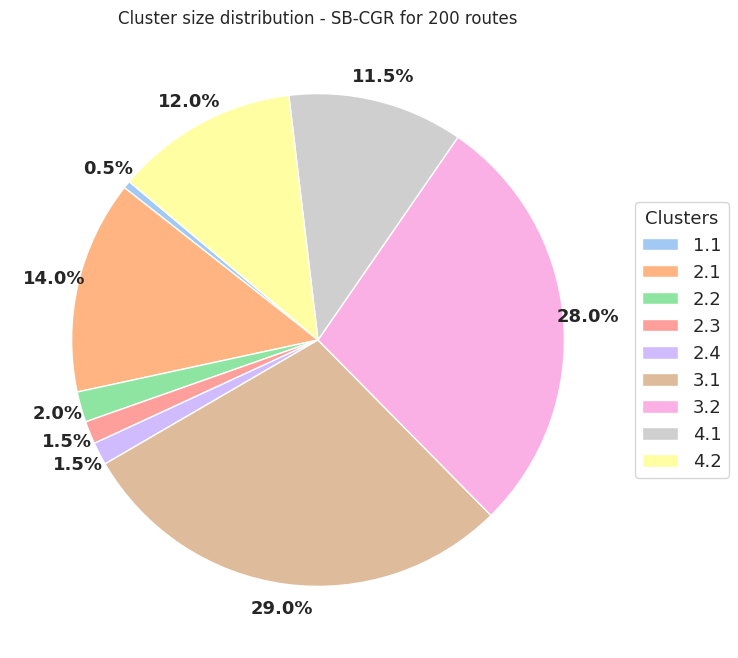

In [77]:
sb_cgr_group_sizes = [inner_dict.get('group_size', 0) for inner_dict in sb_groups.values()]

plot_distribution(sb_cgr_group_sizes, sb_groups, method='SB-CGR')

### Results overlaping Comparison

In [14]:
from cgr_clustering.comparing import compute_contingency_matrix, display_contingency_matrix, match_clusters, calculate_similarity_metrics

Adjusted Rand Index (ARI): 0.1252
Normalized Mutual Information (NMI): 0.3879
Entropy first: 1.7245
Entropy second: 1.9823
Mutual Information: 0.7189
Variation of Information (VI): 2.2691

Contingency matrix:
second_partition  1   2   3   4   5   6   7   8   9   10  ...  15  16  17  18  \
first_partition                                           ...                   
1.1                1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2.1                0   0  20   0   0   1   0   7   0   0  ...   0   0   0   0   
2.2                0   0   4   0   0   0   0   0   0   0  ...   0   0   0   0   
2.3                0   0   0   0   1   0   0   2   0   0  ...   0   0   0   0   
2.4                0   1   1   0   0   0   0   1   0   0  ...   0   0   0   0   
3.1                0   0   0   1   0   0   1   0   5   1  ...  25   0   0   0   
3.2                0   0   0   0   0   0   0   0   0   0  ...  20   1   1   1   
4.1                0   0   0   0   0   0   0   0   3   0  ... 

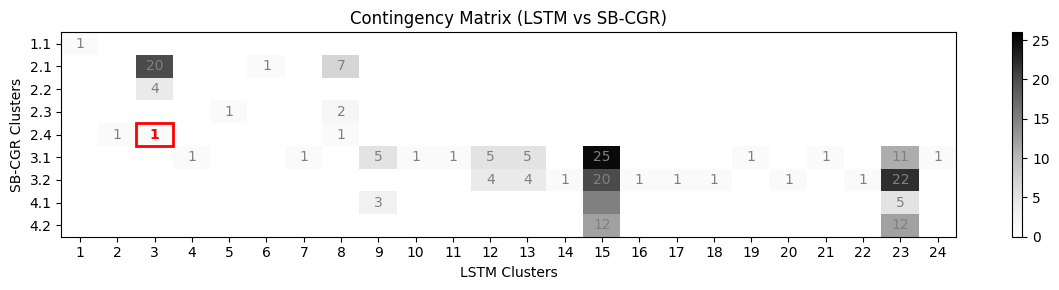

In [30]:
y_true, y_pred = calculate_similarity_metrics(sb_groups, clusters)
cm = compute_contingency_matrix(y_true, y_pred)
# print("Contingency matrix:")
# print(cm, "\n")

matched, avg_jaccard = match_clusters(sb_groups, clusters)
display_contingency_matrix(sb_groups, clusters, matched, cm, method='LSTM')

### Extract the routes_id in ASKCOS by given cluster indices

In [48]:
from cgr_clustering.comparing import contingency_nodes
import numpy as np



lstm_ind = 5
sb_cgr_ind = '2.3'
print(contingency_nodes(sb_groups, clusters, sb_cgr_ind, lstm_ind))
print(np.array(contingency_nodes(sb_groups, clusters, sb_cgr_ind, lstm_ind)) - min(clusters[lstm_ind]) + 1 )

[28]
[1]


### For inter-comparison with other retorysnthteic tools' results (SynPlanner and AiZynthFinder)

In [16]:
import pickle

pickle.dump(sb_groups, open('askcos_clusters.pkl', 'wb'))